In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import gmplot
import requests
from nltk.corpus import stopwords # Used for processing most popular topics, may require downloading
from bs4 import BeautifulSoup

## Mastodon Instance Map

In [2]:
cd ./Analysis/Mastodon/

/Users/mo/Courses/ECE143/ECE143Project/Analysis/Mastodon


In [3]:
import generate_instance_coordinates
import generate_map
import generate_instance_data
import popular_topics
import population
import intersection
import dcfunding

In [4]:
cd ../..

/Users/mo/Courses/ECE143/ECE143Project


In [5]:
generate_instance_coordinates.generate('./Datasets/Mastodon/')

In [6]:
generate_map.generate('./Datasets/Mastodon/instance_coordinates.csv')
# Note: The heatmap in the presentation slides has markers on each point from the csv file,
# but the heatmap produced does not include markers

## Extract data from Mastodon API

In [7]:
generate_instance_data.generate('./Datasets/Mastodon/')

## Most Popular Topics

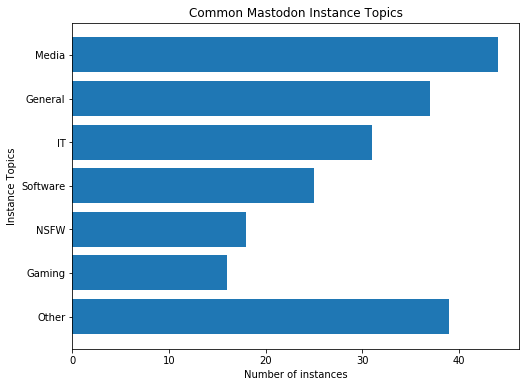

In [8]:
popular_topics.produce_topics()

## Mastodon Population Growth Over Time

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


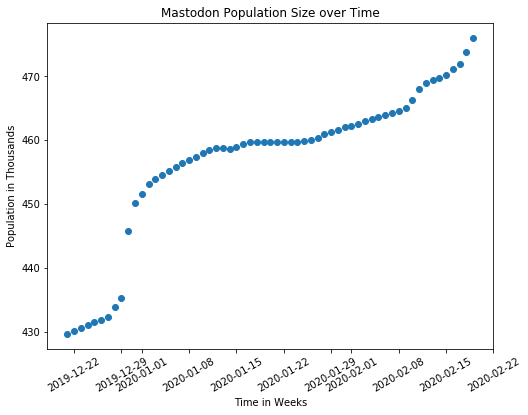

In [9]:
population.generate()

## Mastodon and Reddit Intersection

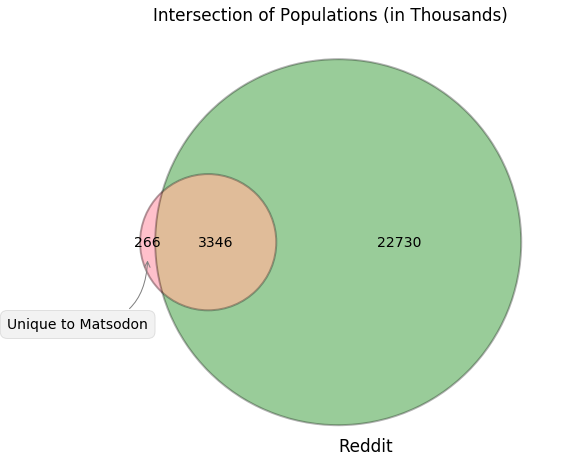

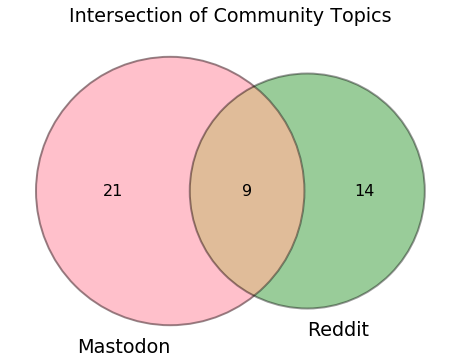

In [10]:
intersection.generate()

## Mastodon Revenue Model

In [ ]:
monthly_donations = 6380
total_patrons = 752

patrons = pd.read_csv('Datasets/Mastodon/mastodon_patreon.csv')

patrons = dcfunding.calc_donations(patrons,total_patrons)
patrons.head()

The patrons data is best illustrated in a pie chart.

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ratios = list(patrons['total_donations'])
labels = list(patrons['Donation level'])
explode = [0, 0, 0, 0, 0.15, 0.15] # isolate platinum and gold sponsors
colors = ['darksalmon','seagreen','palevioletred','silver','goldenrod','lightslategrey']
angle = 110  # rotate so that platinum and gold are split by the x-axis

ax.pie(ratios, autopct='%1.1f%%', startangle=angle, labels=labels, explode=explode,colors=colors)
ax.set_title('Monthly donations ($6388)')
ax.figure.savefig('Figures/mastodon_sponsors.png', transparent=True)
plt.tight_layout()
plt.show()

Furthermore, we can look into company donations through the platinum and gold sponsors:

In [ ]:
co_sponsors = pd.read_csv('Datasets/Mastodon/mastodon_gold_sponsors.csv')
ind_co_sponsors = dcfunding.ind_platgold(co_sponsors,plotName='Figures/mastodon_pg_sponsors.jpg')